1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.
2. *Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).
3. *Оптимизировать код для KNN (оставить один цикл, либо обойтись без циклов вообще).

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [2]:
X, y = load_iris(return_X_y=True)

Разделим выборку на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

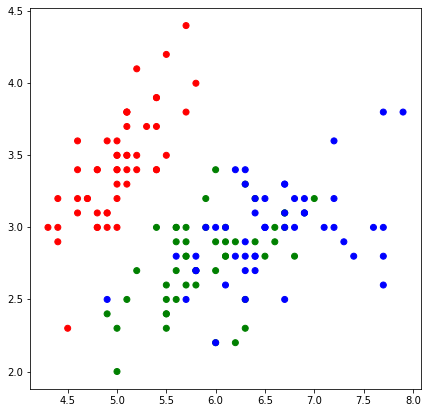

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [6]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Напишем функцию для вычисления точности

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [8]:
k = 10

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 10: 0.967
Точность алгоритма на тестовой выборке при k = 10: 0.967


Построим график распределения классов.

In [9]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

(2352, 2)


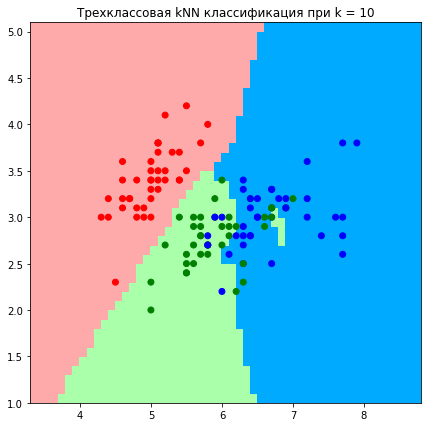

Wall time: 7.75 s


In [10]:
%%time
get_graph(X_train, y_train, k)

In [11]:
k = 9

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 9: 0.958
Точность алгоритма на тестовой выборке при k = 9: 0.967


(2352, 2)


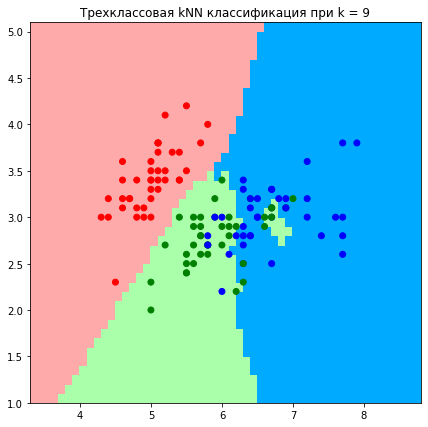

Wall time: 7.73 s


In [12]:
%%time
get_graph(X_train, y_train, k)

In [13]:
k = 5

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 5: 0.967
Точность алгоритма на тестовой выборке при k = 5: 0.967


(2352, 2)


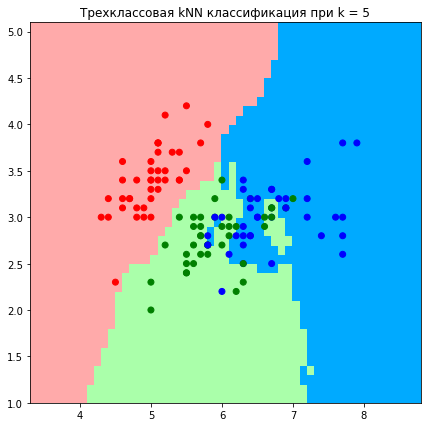

Wall time: 7.72 s


In [14]:
%%time
get_graph(X_train, y_train, k)

In [15]:
k = 3

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 3: 0.958
Точность алгоритма на тестовой выборке при k = 3: 0.967


(2352, 2)


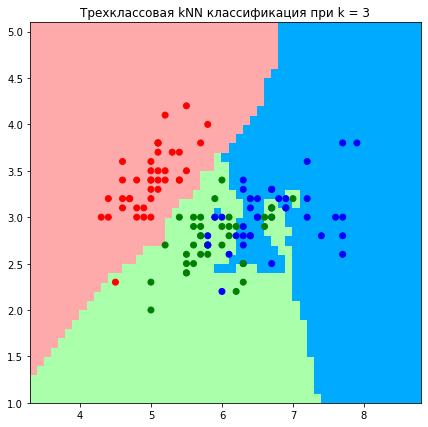

Wall time: 7.87 s


In [16]:
%%time
get_graph(X_train, y_train, k)

Добавим в функцию веса в зависимости от номера соседа

In [17]:
def knn(x_train, y_train, x_test, k, weights=None):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for i, d in enumerate(sorted(test_distances)[0:k]):
            w = weights(i, d[0]) if weights else 1
            
            classes[d[1]] += w

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [18]:
def weights_n_neighbor(i, d):
    q = 0.6
    return q ** i

In [19]:
k = 10

y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 10: 0.983
Точность алгоритма на тестовой выборке при k = 10: 0.967


In [20]:
k = 9

y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 9: 0.983
Точность алгоритма на тестовой выборке при k = 9: 0.967


In [21]:
k = 5

y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 5: 0.975
Точность алгоритма на тестовой выборке при k = 5: 0.967


In [22]:
k = 3

y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 3: 1.000
Точность алгоритма на тестовой выборке при k = 3: 0.967


**Вывод:** при добавлении весов в зависимости от номера соседа точность меняется только на трейне, на тесте точность остаётся прежней.